In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### display
This following function stores the image arrays into one array. It can be called directly after setting a figure and axes to display the images.

convert images to grayscale

In [11]:
coef = [0.299, 0.587, 0.114] # R, G, B coefficients for conversion to grayscale, respectively

def rgb_to_gray(folder, l, P1):
    
    # 1
    if l == 'bg':
        file = f'{folder}/background.png'
    else:
        file = f'{folder}/l={l}, P1={P1}.png' # get filename
    
    img = plt.imread(f'{file}') # import the image as an array of RGB values per pixel
    
    # 2.
    # copy the values to a new array (I am not allowed to operate directly on the imported image)
    mod = img.copy().astype('float64')
    for i, c in enumerate(coef):
        mod[:,:,i] *= c # multiply the ith color value by its corresponding coefficient
                        # (e.g. 0 (red - first of the three) : 0.299 (multiplication factor))
    gray = np.sum(mod, axis=2) # sum the RGB values per pixel
    
    return gray

In [27]:
def store_imgs(folder, l_min, l_max, l_inc, p1_min, p1_max=1):
    bg_gray = rgb_to_gray(folder, l='bg', P1='')
    l_arr = np.round(np.arange(l_min, l_max+l_inc, l_inc), 2)
    if p1_min == p1_max:
        p1_arr = [p1_min]
    else:
        p1_arr = np.round(np.linspace(start=p1_min, stop=p1_max, num=11), 2)
    
    imgs = [] # list of image arrays

    # process and store the image arrays
    for l in l_arr:
        for p1 in p1_arr:
            raw_gray = rgb_to_gray(folder, l=l, P1=p1)
            imgs.append(raw_gray)

    imgs = np.array(imgs).reshape(len(l_arr), len(p1_arr), 2016, 2016)
    return imgs

#### integer $l$

In [4]:
# the array of images for LG intensity profiles
LG_int_imgs = store_imgs(folder='LG beams', l_min=1, l_max=5, l_inc=1, p1_min=0, p1_max=1)

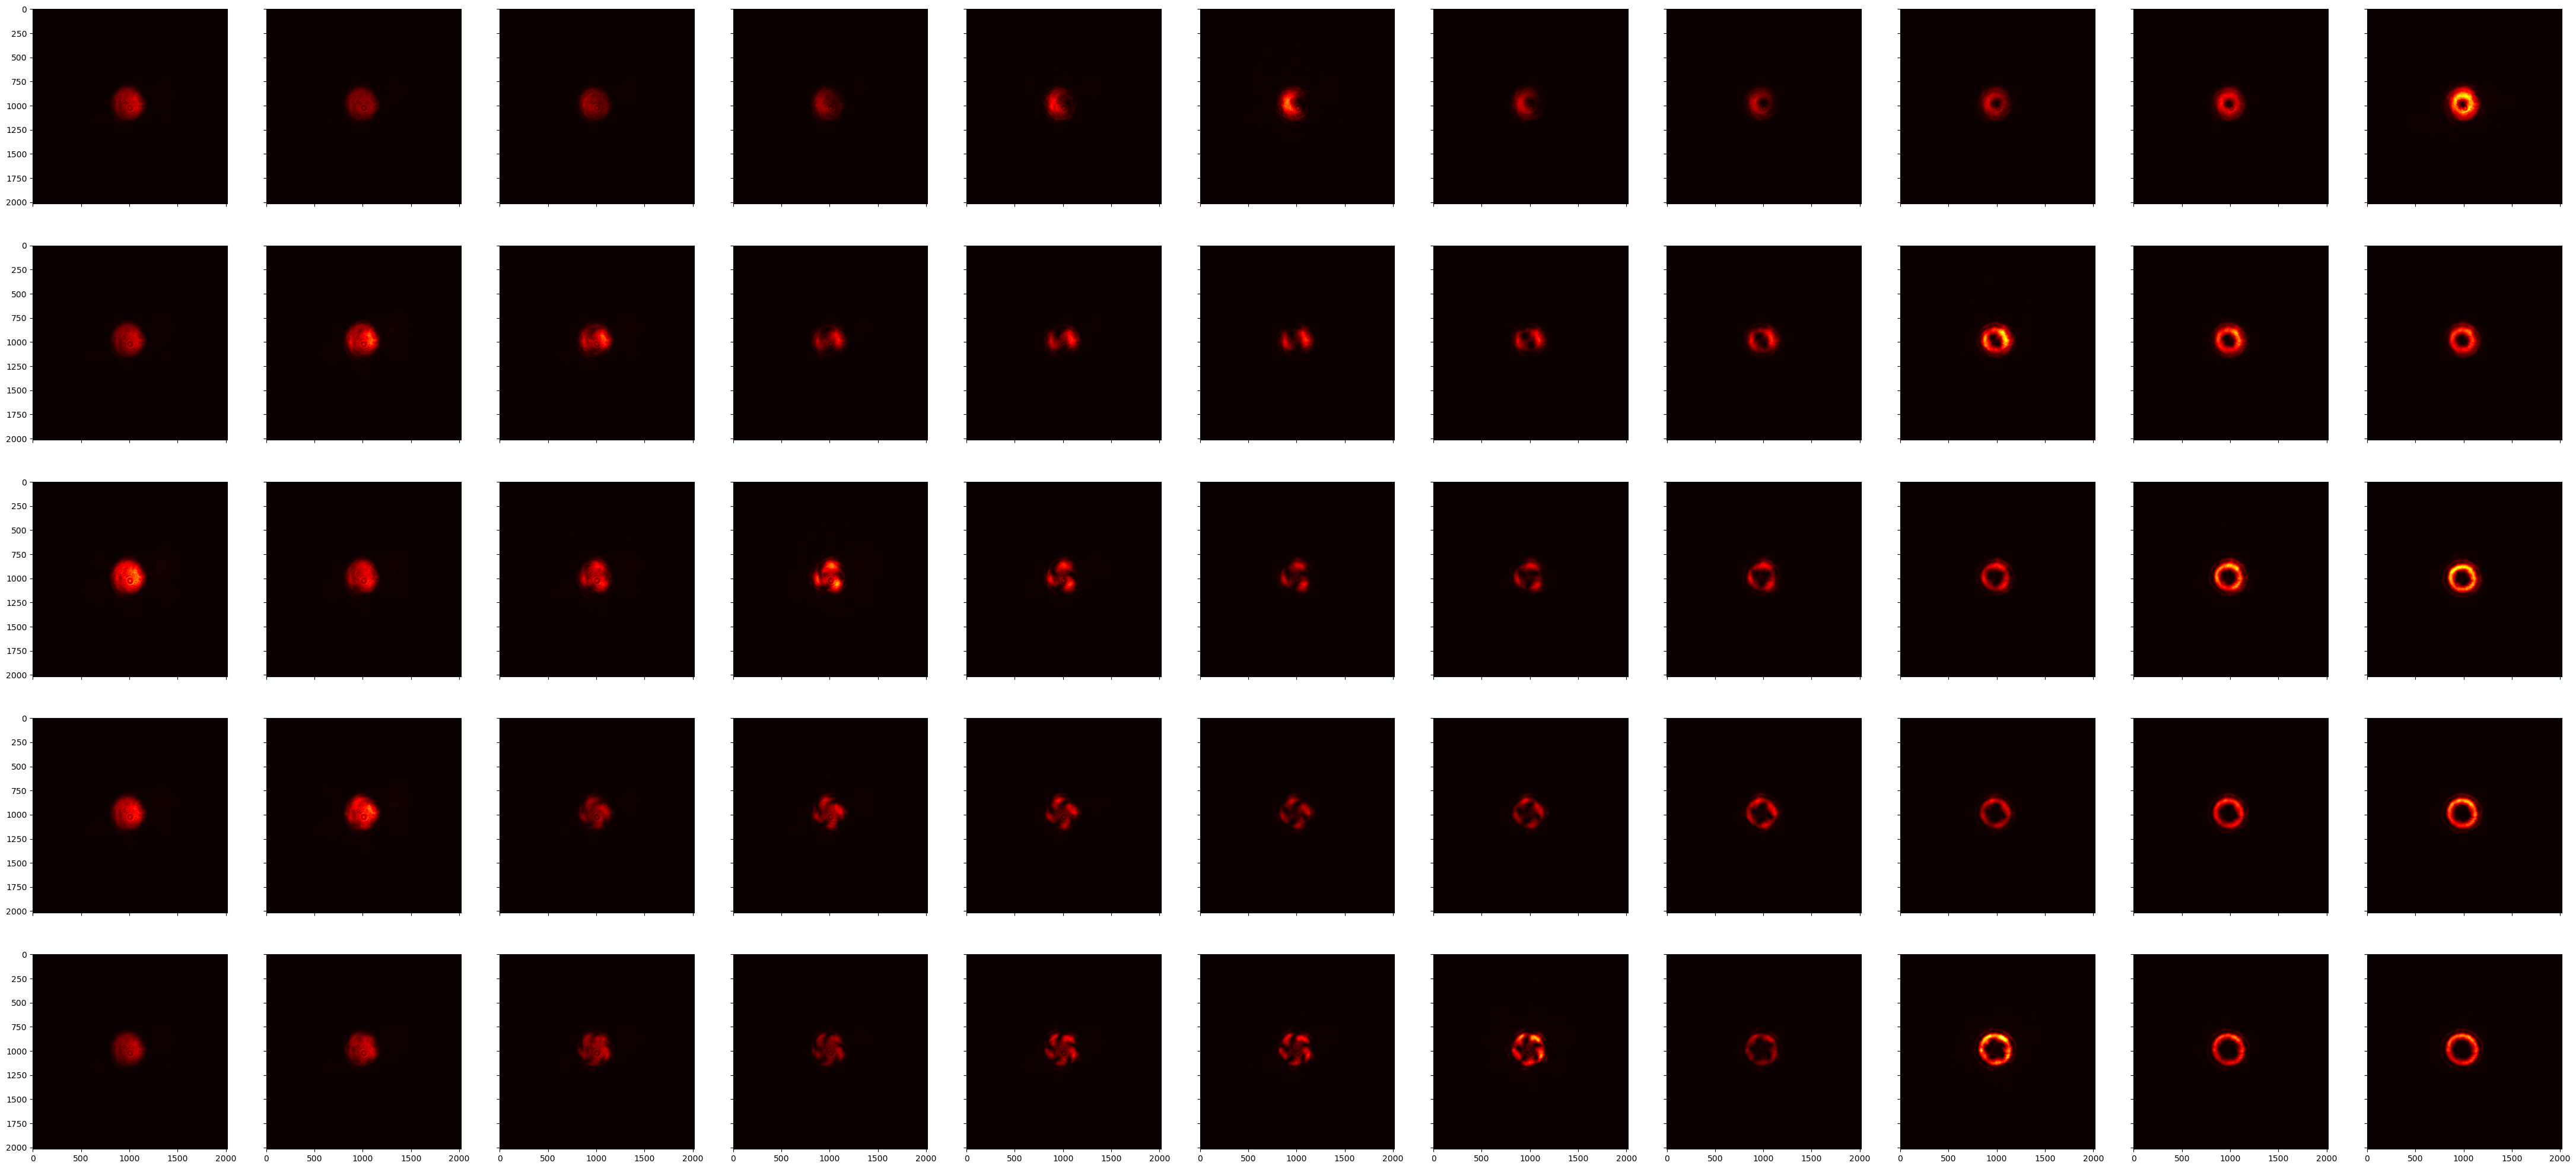

In [5]:
fig, ax = plt.subplots(5, 11, sharex = all, sharey=all)

# without normalizing each image to 1
for l in range(LG_int_imgs.shape[0]):
    for p1 in range(LG_int_imgs.shape[1]):
        ax[l, p1].imshow(LG_int_imgs[l, p1, :, :], cmap='hot')

fig.set_size_inches(55, 25)

###### ~subtract the background - for display purposes only~

#### sum of all pixel values

refer to: Baluyot & Hermosa, "Intensity profiles and propagation of optical
beams with bored **helical** phase"

In [6]:
def get_sum_pixels(img):
    sums = np.sum(img, axis=(2,3)) # this should be a 2-dimensional array: rows corresponding to l, columns corresponding to p1
    return sums

In [7]:
LG_i_sums = get_sum_pixels(LG_int_imgs)

In [8]:
p1_arr = np.round(np.linspace(start=0, stop=1, num=11), 2)

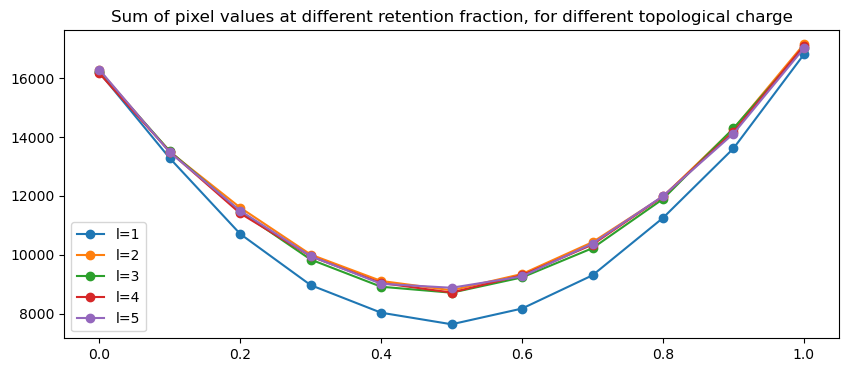

In [9]:
fig, ax = plt.subplots()
for l in range(5):
    ax.plot(p1_arr, LG_i_sums[l], label=f'l={l+1}', marker='o')

ax.legend()
ax.set_title('Sum of pixel values at different retention fraction, for different topological charge')
fig.set_size_inches(10, 4)

#### ~linfoots: sum vs % info - you may normalize "sum" to go [0, 1]. Expecting a monotone increase. F, Q, T~

note: `i` = incomplete; `o` = complete

- Q - correlation Quality, "the alignment of peaks & troughs"
- T - "relative structural contenT". "sharpness"

mod for presentation (optional):
- normalization to a higher maximum: increase the intensity of the beams without changing the relative intensities betw. pics
- but use raw images for data analysis!

#### cylindrical lens
12/02/2024
Alperin, et al. 2016

In [26]:
cyl_int_imgs = store_imgs(folder='cyl lens', l_min=0, l_max=5, l_inc=1)

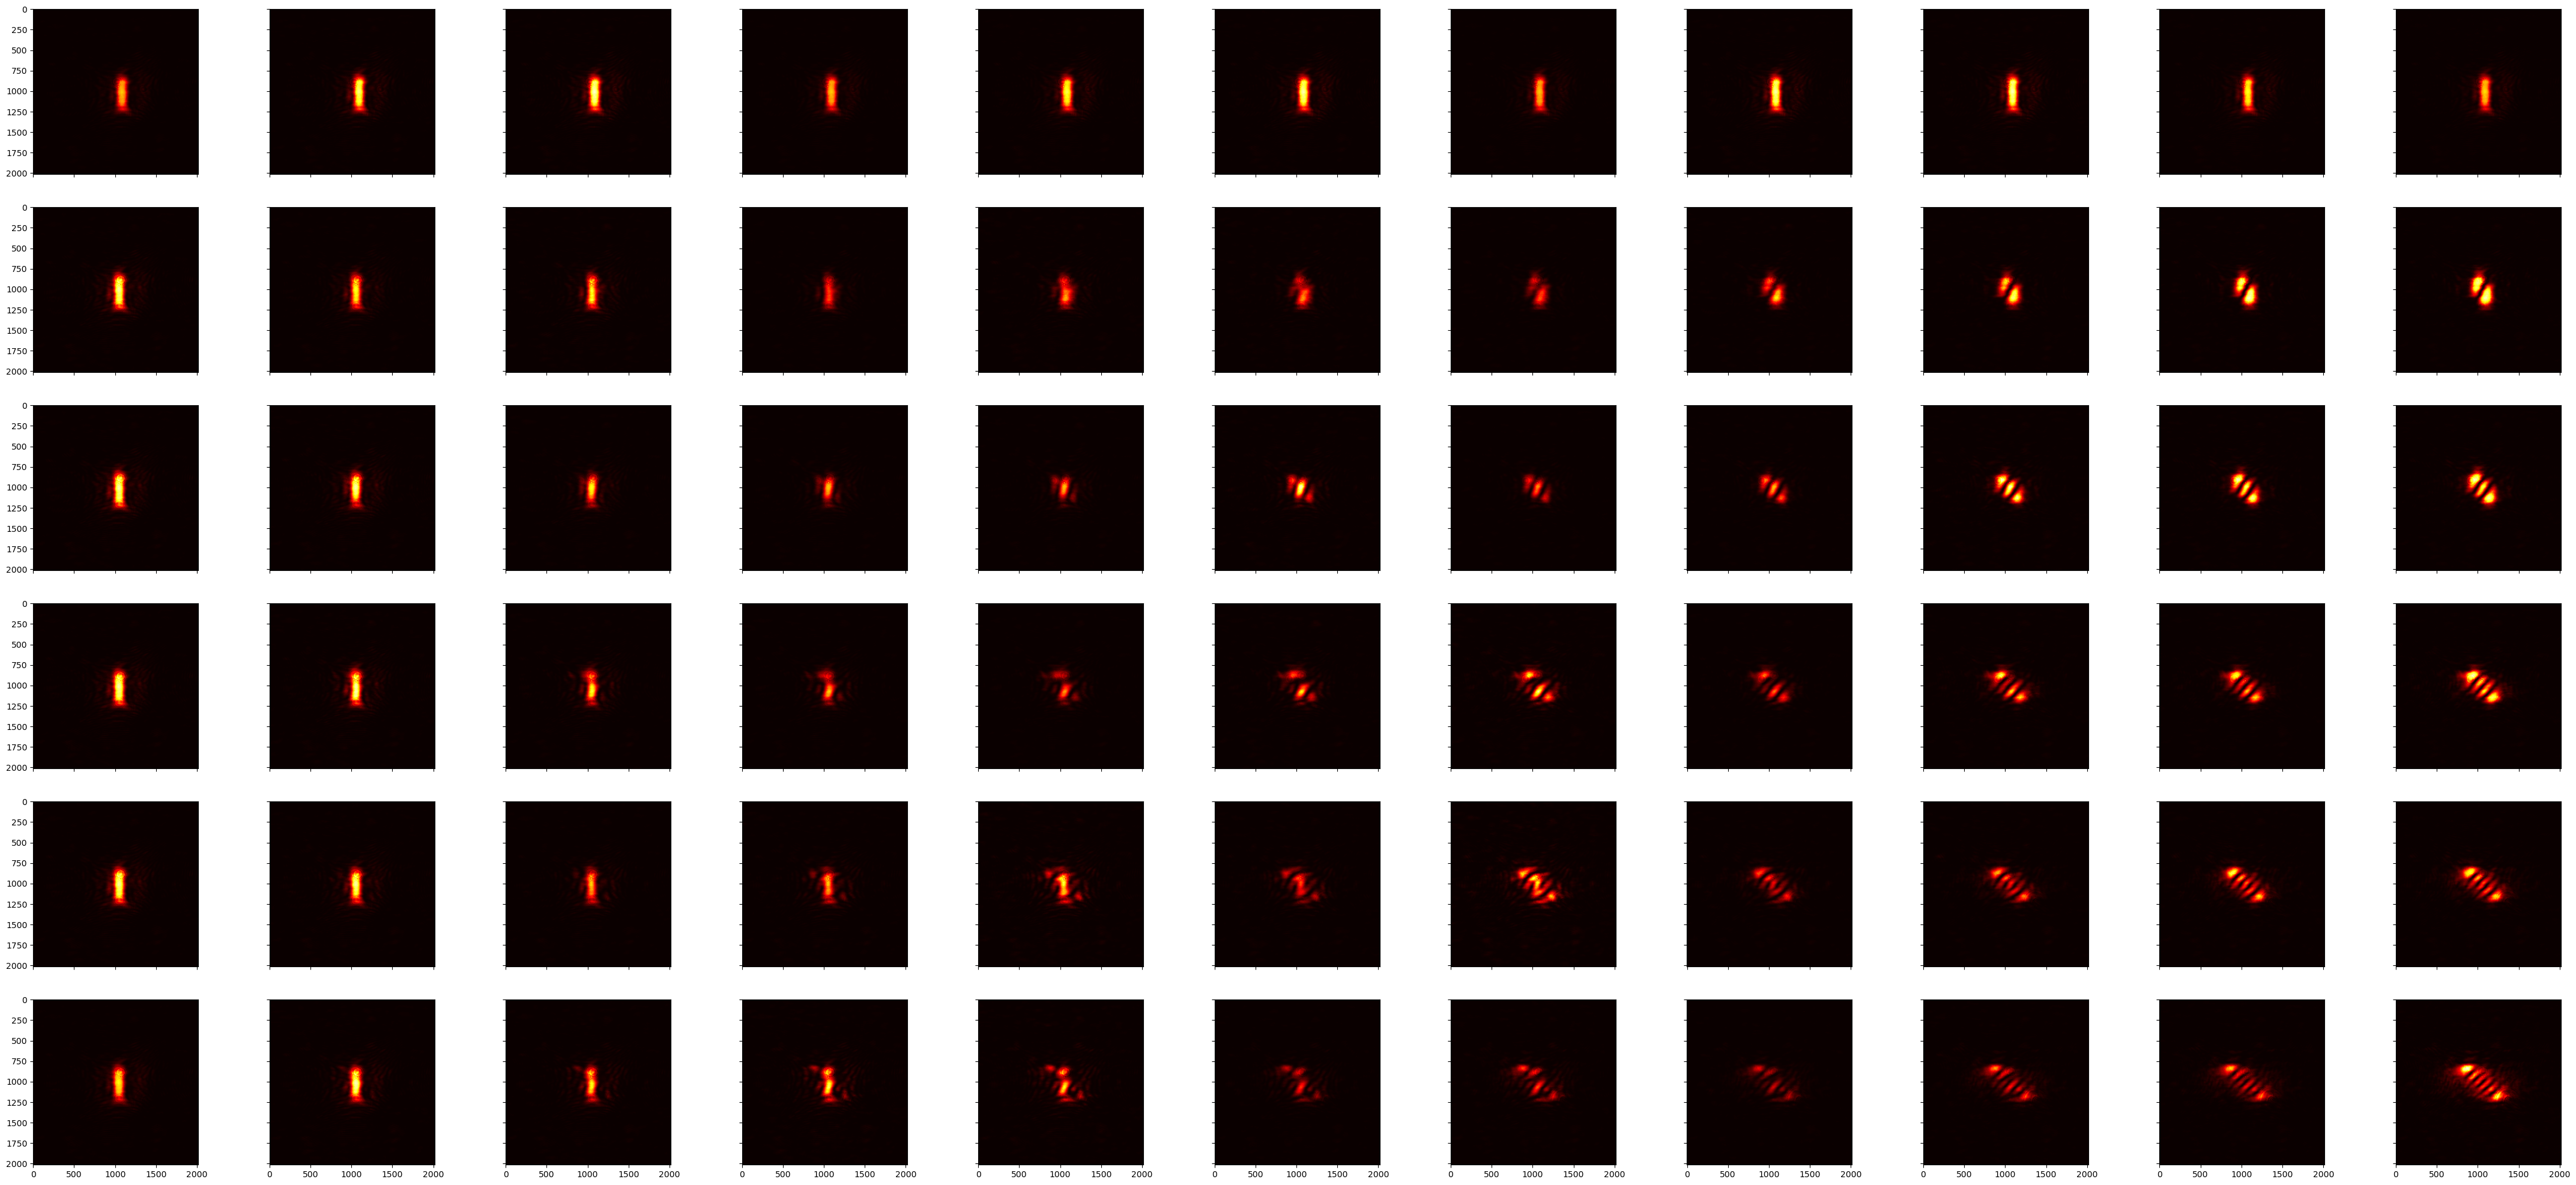

In [12]:
fig, ax = plt.subplots(6, 11, sharex = all, sharey=all) # change the number of rows depending on your upper and lower bounds for l

# without normalizing each image to 1
for l in range(cyl_int_imgs.shape[0]):
    for p1 in range(cyl_int_imgs.shape[1]):
        ax[l, p1].imshow(cyl_int_imgs[l, p1, :, :], cmap='hot')

fig.set_size_inches(55, 25)

In [13]:
LG_cyl_sums = get_sum_pixels(cyl_int_imgs) # IT WORKED AAAA

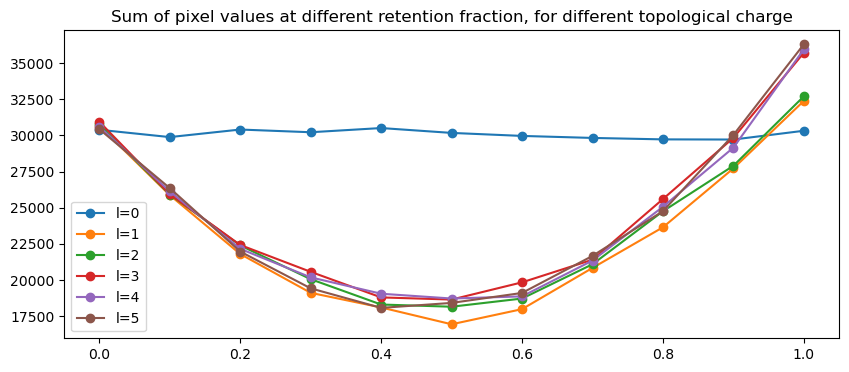

In [14]:
fig, ax = plt.subplots()
for l in range(6):
    ax.plot(p1_arr, LG_cyl_sums[l], label=f'l={l}', marker='o')

ax.legend()
ax.set_title('Sum of pixel values at different retention fraction, for different topological charge')
fig.set_size_inches(10, 4)

#### cylindrical lens - fractional $l$
increments of 0.2, $l \in [3, 5]$

In [36]:
cyl_frac_imgs = store_imgs(folder='cyl lens frac l', l_min=3, l_max=5.0, l_inc=0.2)

In [40]:
cyl_frac_imgs.shape

(11, 11, 2016, 2016)

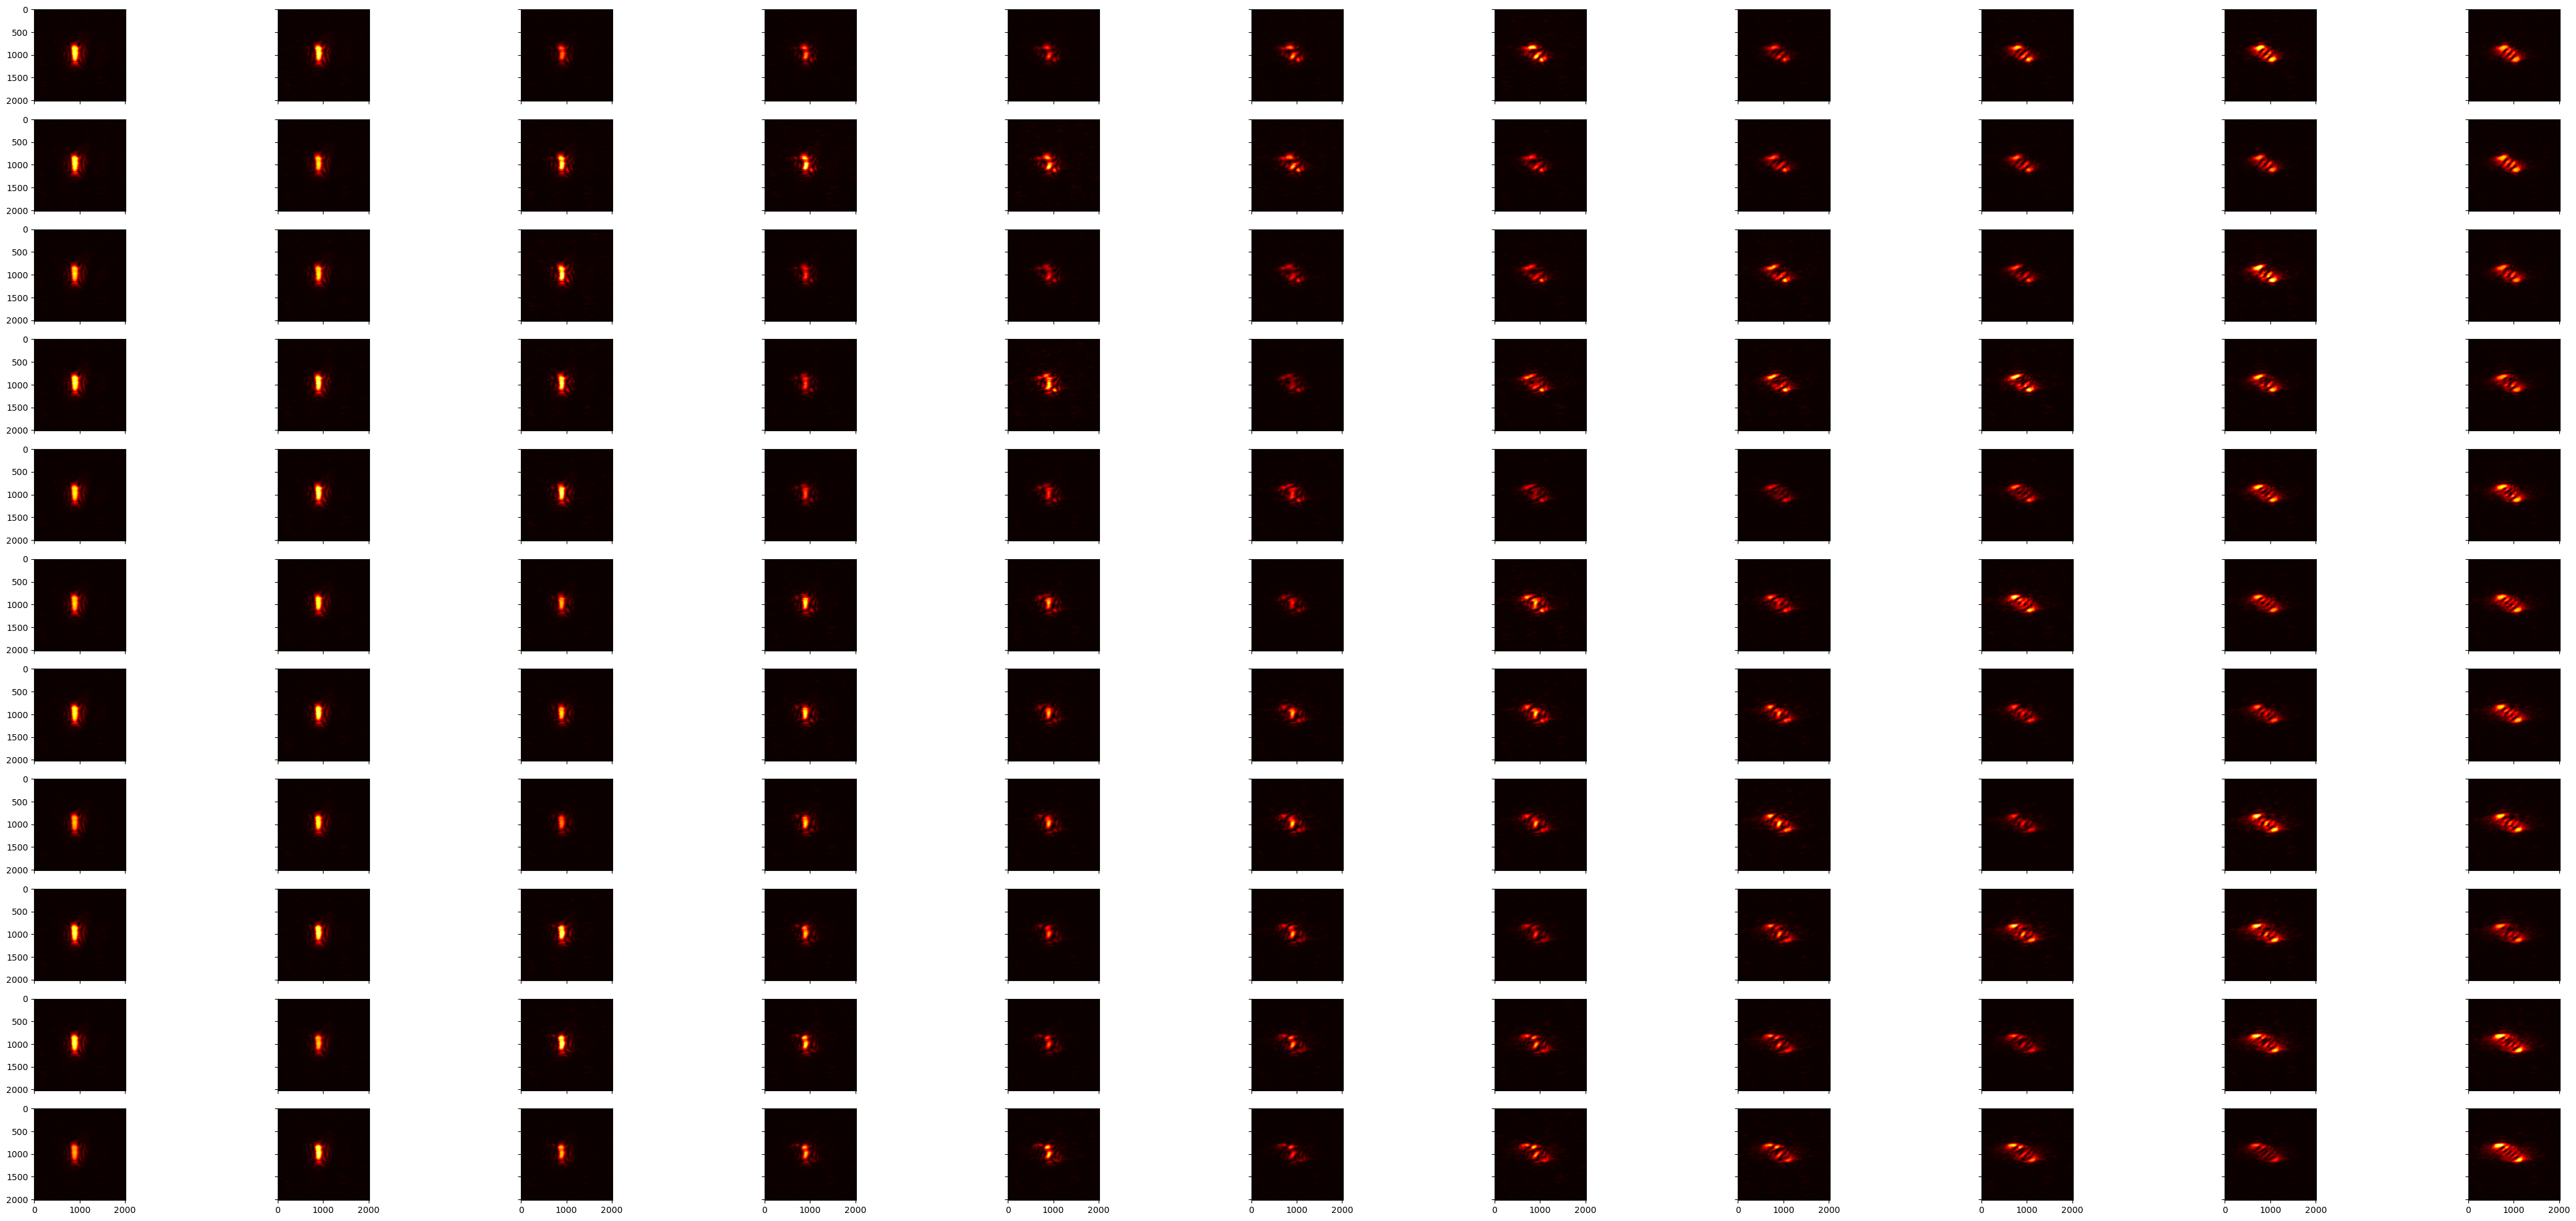

In [42]:
fig, ax = plt.subplots(11, 11, sharex = all, sharey=all) # change the number of rows depending on your upper and lower bounds for l

# without normalizing each image to 1
for l in range(cyl_frac_imgs.shape[0]):
    for p1 in range(cyl_frac_imgs.shape[1]):
        ax[l, p1].imshow(cyl_frac_imgs[l, p1, :, :], cmap='hot')

fig.set_size_inches(55, 25)

#### raw fractional $l$ beams

In [28]:
frac_imgs = store_imgs(folder='02202024 frac l', l_min=3.0, l_max=5.0, l_inc=0.1, p1_min=1.0)

In [33]:
frac_imgs.shape

(21, 1, 2016, 2016)

In [32]:
row, col = frac_imgs.shape[:2]

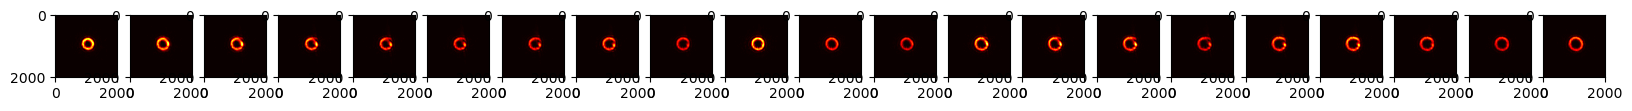

In [50]:
fig, ax = plt.subplots(1, row)
for r in range(row):
    ax[r].imshow(frac_imgs[r, 0, :, :], cmap='hot')
fig.set_size_inches(20, 12)

In [ ]:
fig, ax = plt.subplots()

#### Outlook
Other methods to characterize vortices: single mode fiber, interferometry.
I also captured images of _negative_ topological charge through a cylindrical lens (not yet included in this notebook; I don't know if I will include it because there's nothing unexpected).

What can I find using my results?
- What is the threshold of the cylindrical lens being an effective way to quantify OAM? (based off Alperin)
- Try **fractional topological charge** (the Russian paper)
- What now is the topological charge when, for some initial l, the phase is more and more incomplete?


More data processing to try:
- Radon transform. What pattern will arise? With respect to what? is it more useful?
- get the centroid
- ~mode projection??~

#### take the centroid

#### Take the radon transform
For an image projected on some 2D plane, the Radon transform displays the integral of intensities for line scans at some angle phi, for discrete radii (see p. 57, The Radon Transform and Some of its Applications [Dean, S.R.])

02-19-2023 still studying how to implement and interpret the Radon transform.

In [15]:
from skimage.transform import radon

In [44]:
angles = np.arange(start=0, stop=180)

In [46]:
sinogram = radon(cyl_imgs_frac[0,0,:,:], theta=angles)

C:\Users\Isabella\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


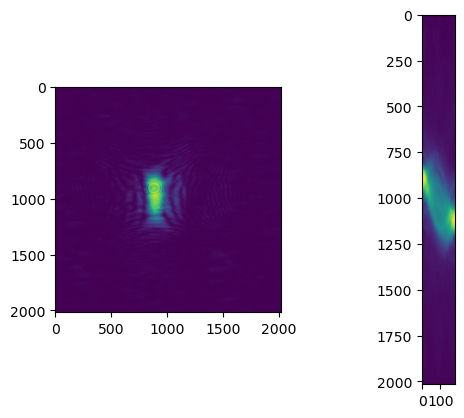

In [47]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cyl_imgs_frac[0,0,:,:])
ax[1].imshow(sinogram)

This result is incorrect, as Radon transform can only be useful for the image if it is centered. So, take the centroid then crop.